In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Загрузка обучающей и тестовой выборки датасет
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

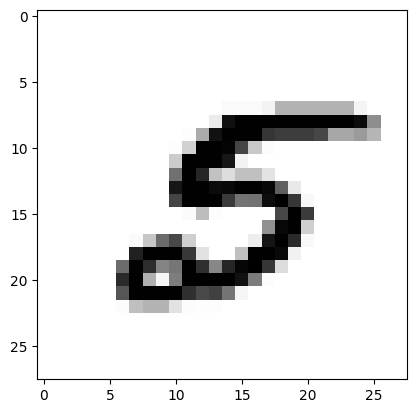

5


In [ ]:
# Нормализация входных данных
x_train, x_test = x_train / 255.0, x_test / 255.0

# Визуализация картинки с рукописной цифрой из датасета
plt.imshow(x_train[5515].reshape((28, 28)), cmap='Greys')
plt.show()
print(y_train[5515])

In [ ]:
# Создание модели
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [15]:
# Компиляция модели
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Определение колбэков для сохранения модели
checkpoint_path = "checkpoints/model-{epoch:02d}-{val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Определение колбэка для ранней остановки
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6)


In [ ]:
# Обучение модели с использованием колбэков
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_split=0.2,
                    batch_size=32,
                    callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.7810 - accuracy: 0.7836
Epoch 1: val_loss improved from inf to 0.38622, saving model to checkpoints/model-01-0.39.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7799 - accuracy: 0.7839 - val_loss: 0.3862 - val_accuracy: 0.8990
Epoch 2/20
  25/1500 [..............................] - ETA: 6s - loss: 0.4366 - accuracy: 0.8788

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.8820
Epoch 2: val_loss improved from 0.38622 to 0.31173, saving model to checkpoints/model-02-0.31.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4121 - accuracy: 0.8820 - val_loss: 0.3117 - val_accuracy: 0.9146
Epoch 3/20
1497/1500 [============================>.] - ETA: 0s - loss: 0.3501 - accuracy: 0.9006
Epoch 3: val_loss improved from 0.31173 to 0.27392, saving model to checkpoints/model-03-0.27.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3499 - accuracy: 0.9006 - val_loss: 0.2739 - val_accuracy: 0.9235
Epoch 4/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.9120
Epoch 4: val_loss improved from 0.27392 to 0.25144, saving model to checkpoints/model-04-0.25.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3103 - accuracy: 0.9119 - val_loss: 0.2514 - val_accuracy: 0.9304
Epoch 5/20
1490/1500 [=====

In [ ]:
# Создание директорий
weights_dir = 'weights'
model_dir = 'model'

if not os.path.exists(weights_dir):
    os.makedirs(weights_dir)

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
# Сохранение весов
weights_path = os.path.join(weights_dir, 'my_model_weights.h5')
model.save_weights(weights_path)

# Сохранение всей модели
model_path = os.path.join(model_dir, 'my_full_model.h5')
model.save(model_path)


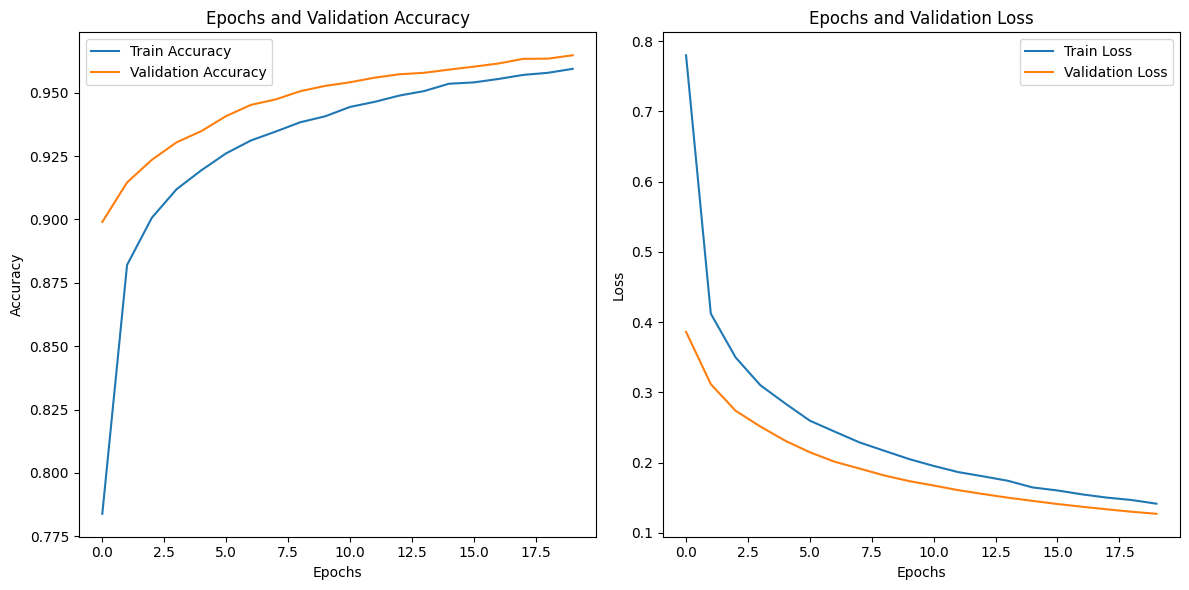

In [ ]:
# Построение графиков точности и потерь
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()